In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [15]:
types = 'argentina','noargentina'
path = Path('imagenes')

if not path.exists():
    path.mkdir()
    for o in types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} argentina')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [16]:
fns = get_image_files(path)
fns
failed = verify_images(fns)
failed
failed.map(Path.unlink);

In [17]:
arg = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

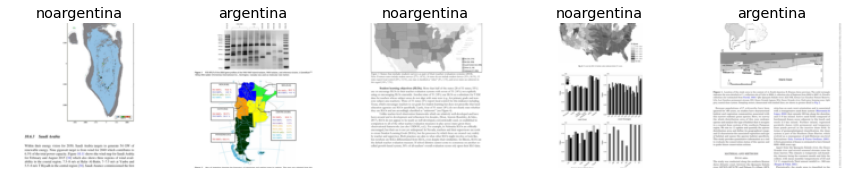

In [18]:
dls = arg.dataloaders(path)
dls.valid.show_batch(max_n=5, nrows=1)

In [19]:
arg = arg.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = arg.dataloaders(path)

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,nan,2.683799,0.857143,00:00


epoch,train_loss,valid_loss,error_rate,time
0,nan,2.683799,0.857143,00:00
1,nan,2.683799,0.857143,00:00
2,nan,2.683799,0.857143,00:00
3,nan,2.683799,0.857143,00:00


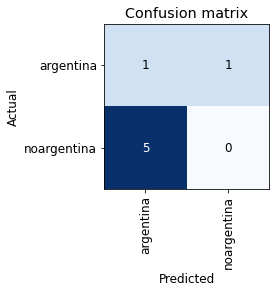

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

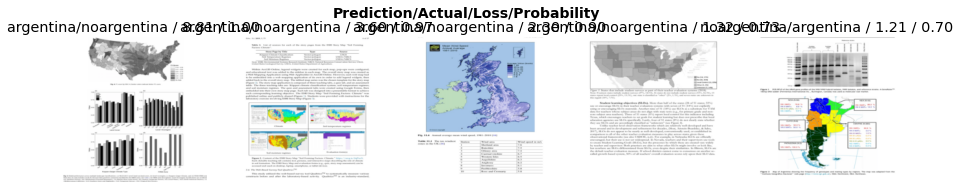

In [22]:
interp.plot_top_losses(5, nrows=1)

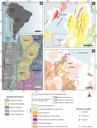

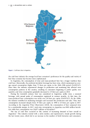

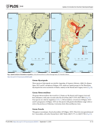

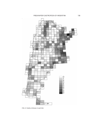

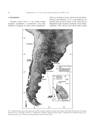

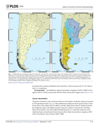

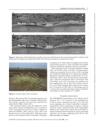

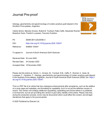

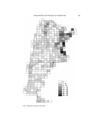

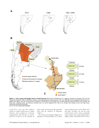

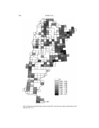

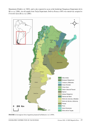

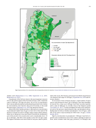

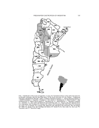

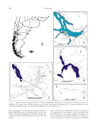

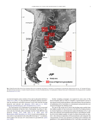

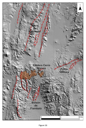

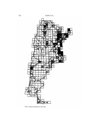

In [23]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [24]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [25]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.dls.vocab

['argentina', 'noargentina']

In [ ]:
learn_inf.predict('IMAGE HERE')